In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tff
import pandas as pd
import matplotlib
import scipy.ndimage as ndi

In [2]:
fpath = '/Users/yungkuo/Google Drive/042216 BLM/'
fname = 'lipid mixed with 9B_2200_13'

In [3]:
datapath = fpath+'raw data/'
tiffimg = tff.TiffFile(datapath+fname+'.tif')
data = tiffimg.asarray().shape
frame = data[0]
movie = tiffimg.asarray()
movie_mean = np.mean(movie, axis=0)
print 'total frame = {}'.format(frame)

total frame = 400


In [4]:
dt = 0.1 #unit: second
V = np.ravel(zip(np.arange(10,170,10), -np.arange(10,170,10)))
scan = 2 #pixels to extract for analysis around QD

# Image and Video

from matplotlib import animation
from html_movie import display_animation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.set_size_inches([5,5])
fig.tight_layout()

def ani_frame(i):
    im = ax.imshow(movie[i,:,:],cmap='gray',interpolation='None')
    im.set_clim([0,7000])
    
    ani = animation.FuncAnimation(fig,update_img,300,interval=30)
    return ani
display_animation(ani_frame(movie))

<matplotlib.colorbar.Colorbar instance at 0x108751758>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


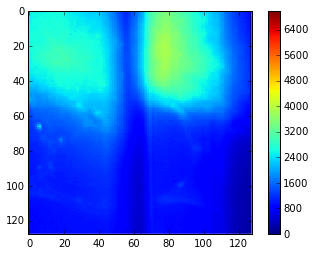

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(movie_mean, clim=(0.0, 7000), interpolation='None')
fig.colorbar(im, ax=ax)

## High pass filter in space and time

In [6]:
movie_HP = movie - ndi.gaussian_filter(movie.astype('float'), sigma=(10, 10, 20))

%matplotlib qt
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(movie_HP.mean(0), interpolation='None')
fig.colorbar(im, ax=ax)
pts = plt.ginput(0,0)

In [7]:
pts = np.array([(6, 65.822580645161295), 
                (18.08064516129032, 73.822580645161295), 
                (6, 89.306451612903231), 
                (12.145161290322584, 88.790322580645153)])

In [8]:
print pts

[[  6.          65.82258065]
 [ 18.08064516  73.82258065]
 [  6.          89.30645161]
 [ 12.14516129  88.79032258]]


(128, 0)

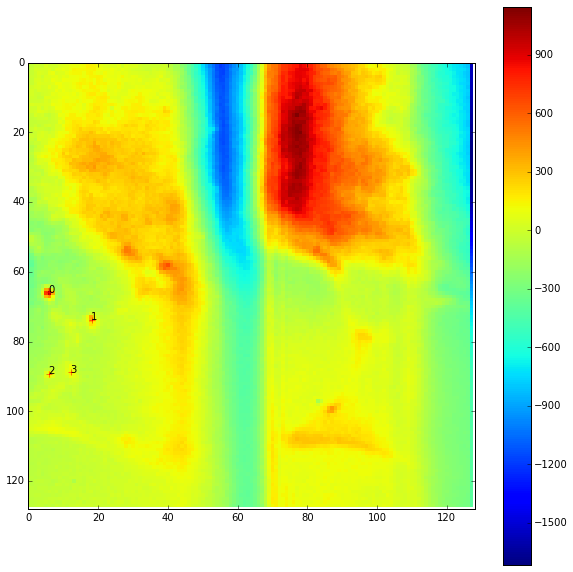

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(movie_HP.mean(0), interpolation='None')
fig.colorbar(im, ax=ax)
for i in range(len(pts)):
    ax.plot(pts[i][0],pts[i][1], 'r+')
    ax.annotate(i, xy=(pts[i][0],pts[i][1]), color='k')
ax.set_xlim(0, data[2])
ax.set_ylim(data[1], 0)

'lipid mixed with 9B_2200_8 good'
pts = np.array([(38, 120),
 (51, 42)])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


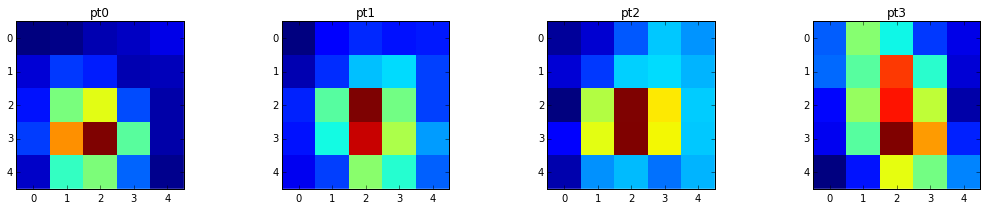

In [10]:
tt = pd.DataFrame()
fig, ax = plt.subplots(1,len(pts), figsize=(15,3))
for i in range(len(pts)):
    ROI = movie[:,(pts[i][1]-scan):(pts[i][1]+scan+1),(pts[i][0]-scan):(pts[i][0]+scan+1)]
    tt['pt{}'.format(i)] = np.mean(np.mean(ROI, axis=2),axis=1)
    ax[i].imshow(movie_mean[(pts[i][1]-scan):(pts[i][1]+scan+1),(pts[i][0]-scan):(pts[i][0]+scan+1)], interpolation='None')
    ax[i].set_title('pt{}'.format(i))
fig.tight_layout()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


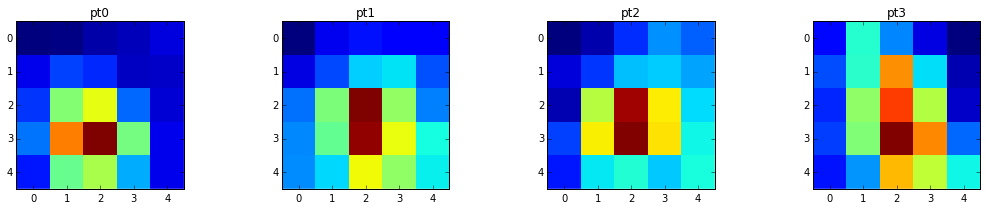

In [11]:
tt = pd.DataFrame()
fig, ax = plt.subplots(1,len(pts), figsize=(15,3))
for i in range(len(pts)):
    ROI = movie_HP[:,(pts[i][1]-scan):(pts[i][1]+scan+1),(pts[i][0]-scan):(pts[i][0]+scan+1)]
    tt['pt{}'.format(i)] = np.mean(np.mean(ROI, axis=2),axis=1)
    ax[i].imshow(movie_HP.mean(0)[(pts[i][1]-scan):(pts[i][1]+scan+1),(pts[i][0]-scan):(pts[i][0]+scan+1)], interpolation='None')
    ax[i].set_title('pt{}'.format(i))
fig.tight_layout()

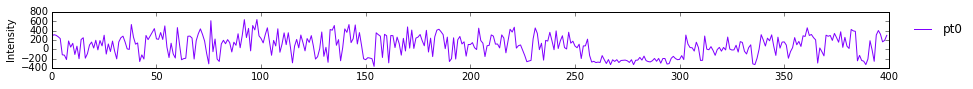

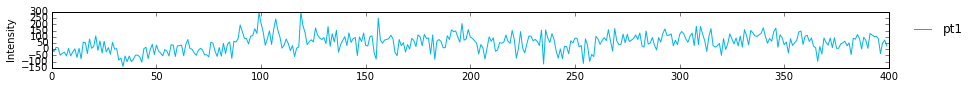

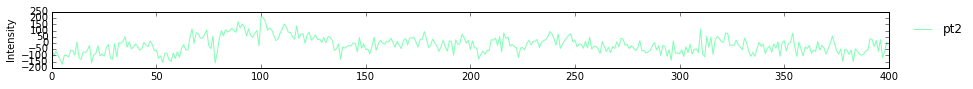

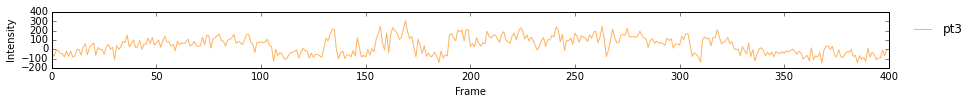

In [12]:
cmap = matplotlib.cm.get_cmap('rainbow')
for count, i in enumerate(tt):
    fig, ax = plt.subplots(figsize=(15,1))
    ax.plot(tt[i],label=i, c=cmap(float(count)/len(pts)))
    ax.legend(bbox_to_anchor=(1.1,1), frameon=False)
    ax.set_ylabel('Intensity')
ax.set_xlabel('Frame')

In [13]:
tt_mean_at_fixV = pd.DataFrame(index=V)
tt_std_at_fixV = pd.DataFrame(index=V)
for count, i in enumerate(tt):
    tt_mean = []
    tt_std = []
    for v in range(len(V)):
        tt_mean1 = np.mean(tt[i][10*v:10*(v+1)])
        tt_mean = np.append(tt_mean, tt_mean1)
        tt_std1 = np.std(tt[i][10*v:10*(v+1)], ddof=1, dtype='d')
        tt_std = np.append(tt_std, tt_std1)
    tt_mean_at_fixV[i] = tt_mean
    tt_std_at_fixV[i] = tt_std

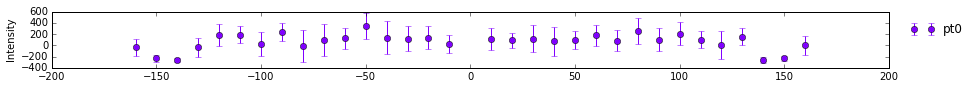

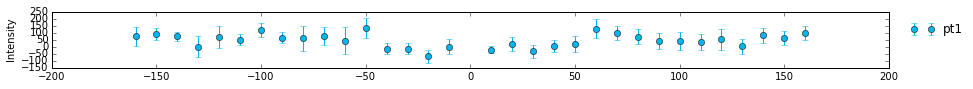

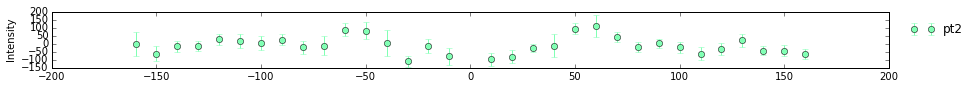

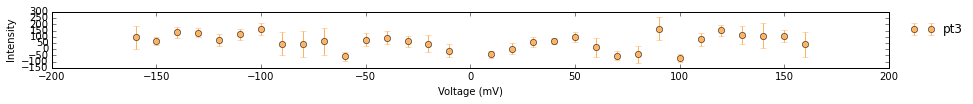

In [14]:
for count, i in enumerate(tt_mean_at_fixV):
    fig, ax = plt.subplots(figsize=(15,1))
    ax.errorbar(V,tt_mean_at_fixV[i], yerr=tt_std_at_fixV[i], fmt='o',label=i, c=cmap(float(count)/len(pts)))
    ax.legend(bbox_to_anchor=(1.1,1), frameon=False)
    ax.set_ylabel('Intensity')
ax.set_xlabel('Voltage (mV)')

## Threshold

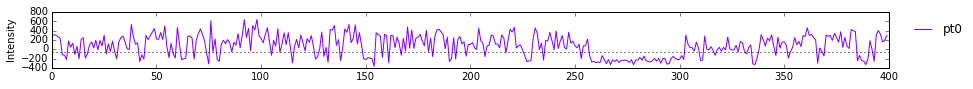

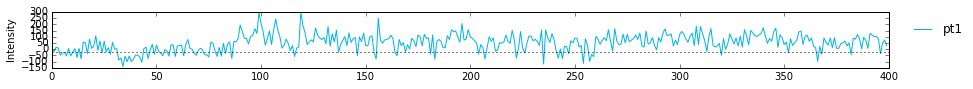

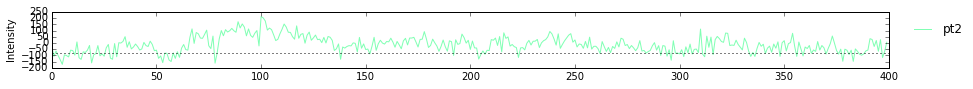

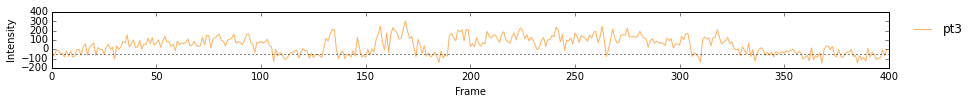

In [15]:
threshold = np.zeros(len(pts))
nstd = [0.6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for count, i in enumerate(tt):
    threshold[count] = np.mean(tt[i])-nstd[count]*np.std(tt[i],ddof=1)
    fig, ax = plt.subplots(figsize=(15,1))
    ax.plot(tt[i],label=i, c=cmap(float(count)/len(pts)))
    ax.axhline(threshold[count], c='k', ls=':')
    ax.legend(bbox_to_anchor=(1.1,1), frameon=False)    
    ax.set_ylabel('Intensity')
ax.set_xlabel('Frame')

In [16]:
tt_mean_at_fixV = pd.DataFrame(index=V)
tt_std_at_fixV = pd.DataFrame(index=V)
for count, i in enumerate(tt):
    tt_mean = []
    tt_std = []
    for v in range(len(V)):
        tt_thre = []
        for k in range(10):
            if tt[i][10*v+k] > threshold[count]:
                tt_thre = np.append(tt_thre, tt[i][10*v+k])
        tt_mean1 = np.mean(tt_thre)
        tt_mean = np.append(tt_mean, tt_mean1)
        tt_std1 = np.std(tt_thre, ddof=1, dtype='d')
        tt_std = np.append(tt_std, tt_std1)
    tt_mean_at_fixV[i] = tt_mean
    tt_std_at_fixV[i] = tt_std

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


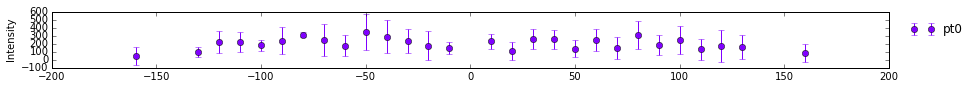

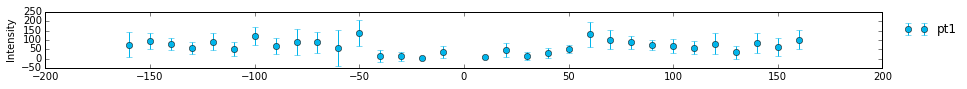

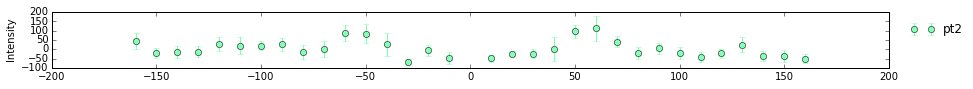

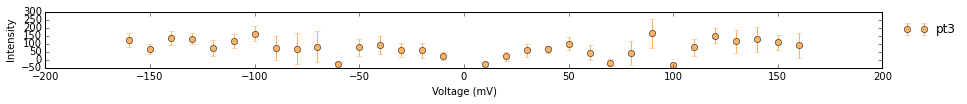

In [17]:
for count, i in enumerate(tt_mean_at_fixV):
    fig, ax = plt.subplots(figsize=(15,1))
    ax.errorbar(V,tt_mean_at_fixV[i], yerr=tt_std_at_fixV[i], fmt='o',label=i, c=cmap(float(count)/len(pts)))
    ax.legend(bbox_to_anchor=(1.1,1), frameon=False)
    ax.set_ylabel('Intensity')
ax.set_xlabel('Voltage (mV)')